# Laboratory practice 2.1: Introduction to ML techniques
# Preparing the dataset

For this practice, you will need the following dataset:

- **SimData.dat**: synthetic datasets containing several input variables and one output variable **Y**.

One of the core packages for machine learning in Python is **scikit-learn**. However, most of the time you *will not be so lucky as to use it* other than to check your answers, since the main idea here is that **you** learn how to code each method and how/why it works. *This goes both for different algorithms as well as preprocessing and analysis techniques*.

Further reading on the scikit-learn library (this will be your best friend in the near future, but again, for now is just for reference):
- [scikit-learn](https://scikit-learn.org)

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
- Plotting (you do not have to use both, you can choose one or the other if you feel confortable):
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)


---

In [23]:
# Load the necessary modules

# plotting libraries (you can use only one, for example plt)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data management libraries (you'll need both here)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine learning libraries (just so you see how some things can be done, although you may not use it too much)
from sklearn.model_selection import train_test_split

---

## STEP 1: IMPORT DATASET

In [24]:
# For starters, load the dataset here into a pandas dataframe called "df" and check the first rows with .head()
df = pd.read_csv("SimData.dat",sep="\t")
print(df.head())

           X1        X2    Y
0  -64.170401       NaN   NO
1  604.457235 -4.703332  YES
2  492.688339 -0.493488  YES
3  438.040887 -2.307669   NO
4  184.349042  2.680303   NO


Is it a regression or a classification problem? Take into account that the target variable is "Y"

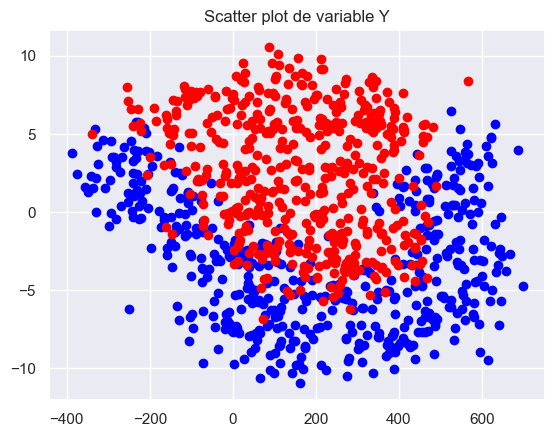

In [25]:
# Taking into account the shape of the dataset, plot it so that you can get acquainted with the data
# Make sure every class is distinguished using different colors and/or shapes in the plot
plt.scatter(df.loc[df.Y == "YES"].X1, df.loc[df.Y == "YES"].X2, c = "blue")
plt.scatter(df.loc[df.Y == "NO"].X1, df.loc[df.Y == "NO"].X2, c = "red")
plt.title("Scatter plot de variable Y")
plt.show()

## STEP 2: CHECK OUT THE MISSING VALUES

In [26]:
# Are there any missing values? How many? Where? 
df.isna().value_counts()

X1     X2     Y    
False  False  False    996
       True   False      2
True   False  False      1
       True   True       1
Name: count, dtype: int64

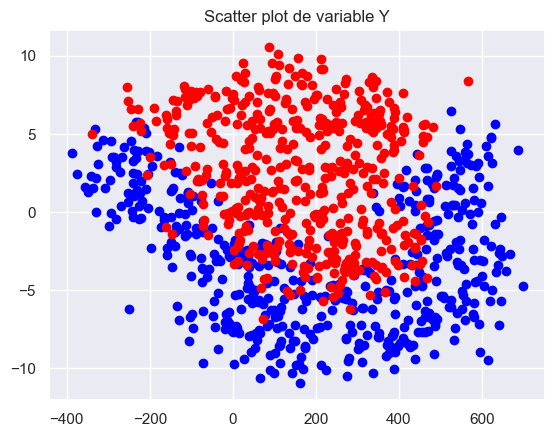

X1     X2     Y    
False  False  False    996
Name: count, dtype: int64


In [27]:
# In this case we will simply remove the missing values by removing the rows with NAs. Do this here.
df = df.dropna()
# Check results. Was your removal succesful?
plt.scatter(df.loc[df.Y == "YES"].X1, df.loc[df.Y == "YES"].X2, c = "blue")
plt.scatter(df.loc[df.Y == "NO"].X1, df.loc[df.Y == "NO"].X2, c = "red")
plt.title("Scatter plot de variable Y")
plt.show()
#checkeamos que se hayan eliminado los missing values
print(df.isna().value_counts())

## STEP 3: PLOT THE DATA AND CHECK OUT FOR OUTLIERS

In [28]:
# Check your main statistics for the data variables and see if everything is clear
df.describe()

,X1,X2
count,996.000000,996.000000
mean,183.233656,-0.348326
std,238.507874,4.939723
min,-388.231360,-10.936124
25%,13.424622,-4.105678
50%,180.989524,-0.416657
75%,369.618619,3.544763
max,697.909378,10.558342


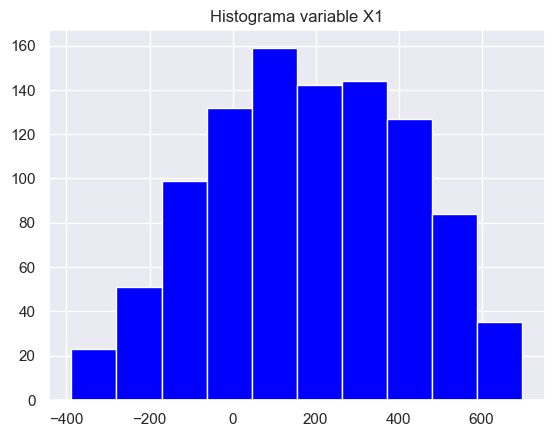

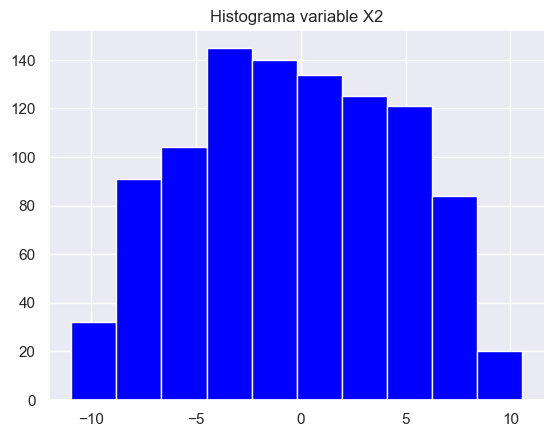

In [29]:
# Plotting is a good way to get to know the data. Do a histogram for each variable to see its behavior.
# Do you see any potential outliers you should take care of?
plt.hist(df.X1,bins = 10, color = "blue")
plt.title("Histograma variable X1")
plt.show()
plt.hist(df.X2,bins = 10, color = "blue")
plt.title("Histograma variable X2")
plt.show()

## STEP 4: ENCODE CATEGORICAL VARIABLES

In [30]:
# Are there any categorical input variables? If unsure, check it
print(df.dtypes)
#como vemos si que hay variables categóricas en la variable Y al ser de tipo object

X1    float64
X2    float64
Y      object
dtype: object


In [31]:
# Convert output variable to a factor (other types of numeric values are okay as well, but we will use this here)

# Convertir 'YES' a 1 y 'NO' a 0
df['Y'] = df['Y'].map({'YES': 1, 'NO': 0})
print(df)
print(df.dtypes)

             X1        X2  Y
1    604.457235 -4.703332  1
2    492.688339 -0.493488  1
3    438.040887 -2.307669  0
4    184.349042  2.680303  0
5    557.127451 -3.632923  1
..          ...       ... ..
995   19.836513  8.469974  0
996  111.016869  9.406449  0
997   11.893636  0.327663  0
998  524.692740 -5.657276  1
999  -97.142722 -6.531316  1

[996 rows x 3 columns]
X1    float64
X2    float64
Y       int64
dtype: object


## STEP 5: Standardize the numerical variables

In [32]:
# Are the numerical variables in the same scale? If unsure, check it
df.describe()
#si estan en diferente escala, se puede ver al haber tanta diferencia entre datos

,X1,X2,Y
count,996.000000,996.000000,996.000000
mean,183.233656,-0.348326,0.501004
std,238.507874,4.939723,0.500250
min,-388.231360,-10.936124,0.000000
25%,13.424622,-4.105678,0.000000
50%,180.989524,-0.416657,1.000000
75%,369.618619,3.544763,1.000000
max,697.909378,10.558342,1.000000


The standardization should be done **after** we perform the train/test split, using only the mean and variance for the training dataset. In this case however, we will forget about this and just do it here, although this is something to keep in mind.

In [33]:
# Standardize the numerical variables. 
# Watch out!: Save the mean and variance so you can undo de standardization anytime you want to
for col in df.columns[:-1]:
    media = df[col].mean()
    desviacion_estandar = df[col].std()

    # Estandarizar cada valor de la columna con la fórmula
    df[col] = (df[col] - media) / desviacion_estandar

In [34]:
# Check if your process worked
df.describe()

,X1,X2,Y
count,9.960000e+02,9.960000e+02,996.000000
mean,8.204058e-17,7.133963e-18,0.501004
std,1.000000e+00,1.000000e+00,0.500250
min,-2.396001e+00,-2.143399e+00,0.000000
25%,-7.119641e-01,-7.606403e-01,0.000000
50%,-9.409048e-03,-1.383306e-02,1.000000
75%,7.814625e-01,7.881188e-01,1.000000
max,2.157898e+00,2.207951e+00,1.000000


## STEP 6: EXPLORATORY ANALYSIS
Inside the exploratory analysis, feel free to play with the data to get to know it further. Some of the best ways to do so is plotting it, showing the correlation plot of numeric variables, etc.

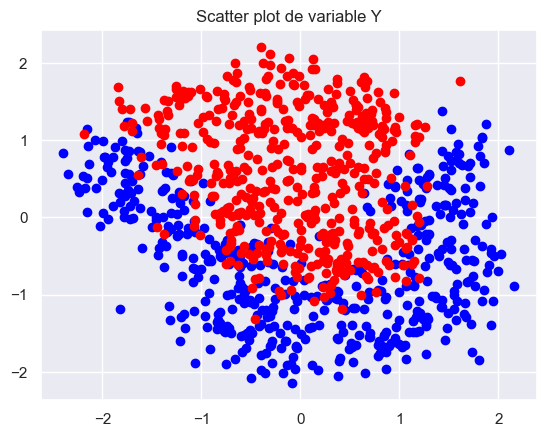

In [35]:
# Do again the scatterplot for the dataset, but now with the processed version
plt.scatter(df.loc[df.Y == 1].X1, df.loc[df.Y == 1].X2, c = "blue")
plt.scatter(df.loc[df.Y == 0].X1, df.loc[df.Y == 0].X2, c = "red")
plt.title("Scatter plot de variable Y")
plt.show()

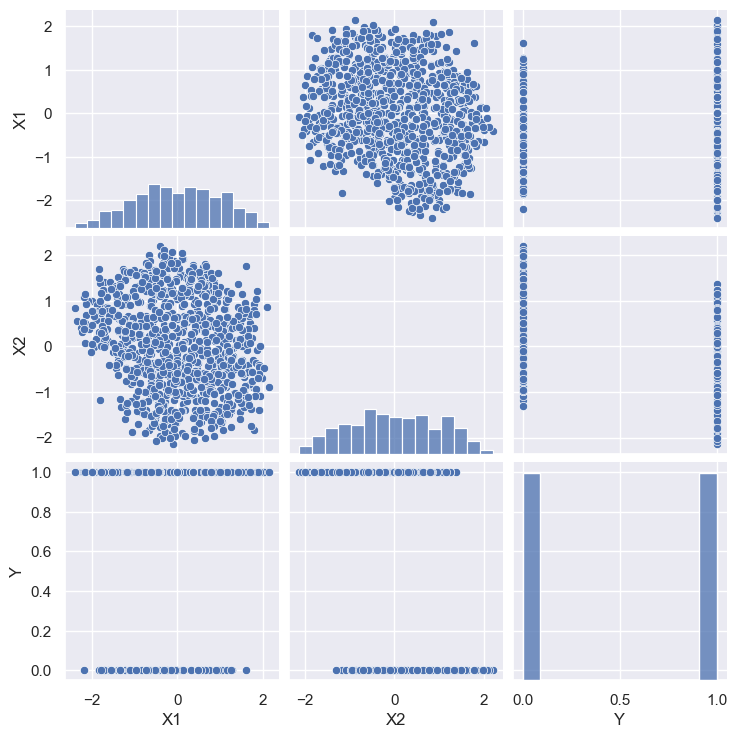

In [36]:
# One idea: perform a scatterplot where you face each variable against each other (all vs. all)
sns.pairplot(df)
plt.show()

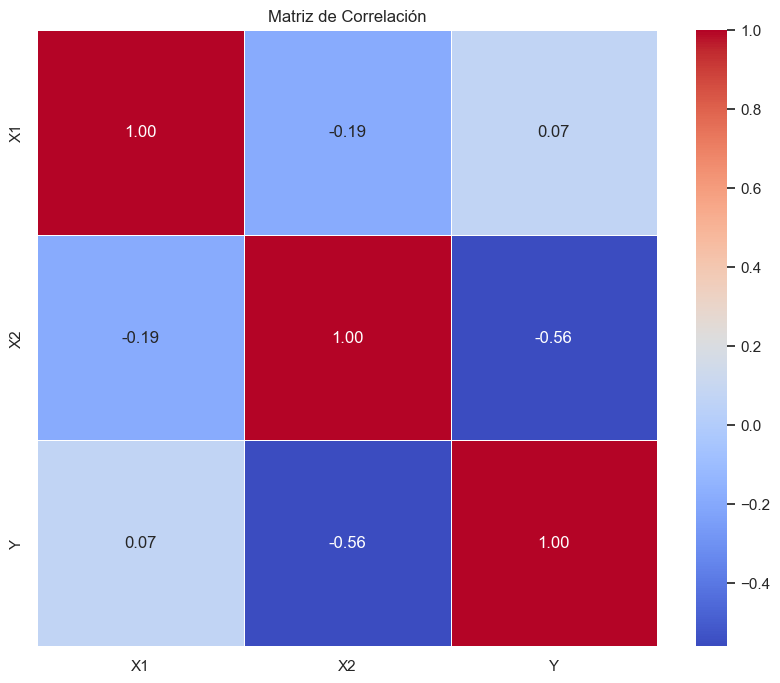

In [37]:
# Obtain and plot the correlation matrix 
# For this, you may want to use the .corr() method in pandas
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

In [38]:
# Feel free to try any other exploration methods here!

## STEP 7: CHECK OUT FOR CLASS IMBALANCES

Are both classes balanced or not?

In [39]:
# Count instances for each class
df.count()
#queda perfectamente equilibrado

X1    996
X2    996
Y     996
dtype: int64

If both classes are kind of similar in number, you can consider the dataset _balanced_

## STEP 8: SPLIT THE DATA INTO TRAINING AND TEST SETS

Now, this is a critical point, and you should watch out here. Doing this properly is not difficult, but mistakes are expensive in this step! (and also you most likely will not notice them until much later, when it's already very far too late)

In [40]:
# Define input and output variables
print("Las variables de input, es decir, de entrada son tanto X1 como X2, mientras que la Y es la de salida.")

Las variables de input, es decir, de entrada son tanto X1 como X2, mientras que la Y es la de salida.


In [41]:
# First: Shuffle the data (check out the .sample() method in pandas)
df_shuffled = df.sample(frac=1).reset_index(drop=True)

# Then, separate the inputs, stored in "X" (pd.dataframe) from the target variable, stored in "y" (pd.series)

X = df_shuffled.drop(columns=['Y'])
y = df_shuffled['Y']

print(X.head())
print(y.head())

         X1        X2
0 -0.569102 -0.373844
1 -0.847775  0.535604
2  0.873594 -1.243888
3 -0.521229 -1.592373
4  0.644668  1.111841
0    0
1    0
2    1
3    1
4    0
Name: Y, dtype: int64


Now for the crucial part: Separate the train and test datasets. 

For now, consider only train/test (forget the validation dataset) and make it so that the training set contains 80% of the data and the test set the remaining 20%


In [42]:
# How many rows will the training dataset have?
rows_train = int(len(X)*0.80)
rows_train

796

In [44]:
# Perform the split
indices = np.random.permutation(len(X))

# Divide los índices en conjuntos de entrenamiento y prueba
train_indices = indices[:rows_train]
test_indices = indices[rows_train:]

# Usa los índices para dividir los datos
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

In [45]:
# Check whether the shape of all dataframes is correct
if len(X_train) != len(y_train):
    print("Ojo: los datsets de training tiene distintos tamaños!")

if len(X_test) != len(y_test):
    print("Ojo: los datsets de test tiene distintos tamaños!")
else:
    print("Todo correcto!")

Todo correcto!


In [ ]:
# See how convenient sklearn becomes here, for example...
'''
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  # percentage of test data
                                                    random_state=0, # seed for replication
                                                    stratify = y)   # Preserves distribution of y
'''

'\nX_train, X_test, y_train, y_test = train_test_split(X, y,\n                                                    test_size=0.2,  # percentage of test data\n                                                    random_state=0, # seed for replication\n                                                    stratify = y)   # Preserves distribution of y\n'

### 8.1 - Plot the train and test datasets
We'll do this simple check to see if everything looks fine here

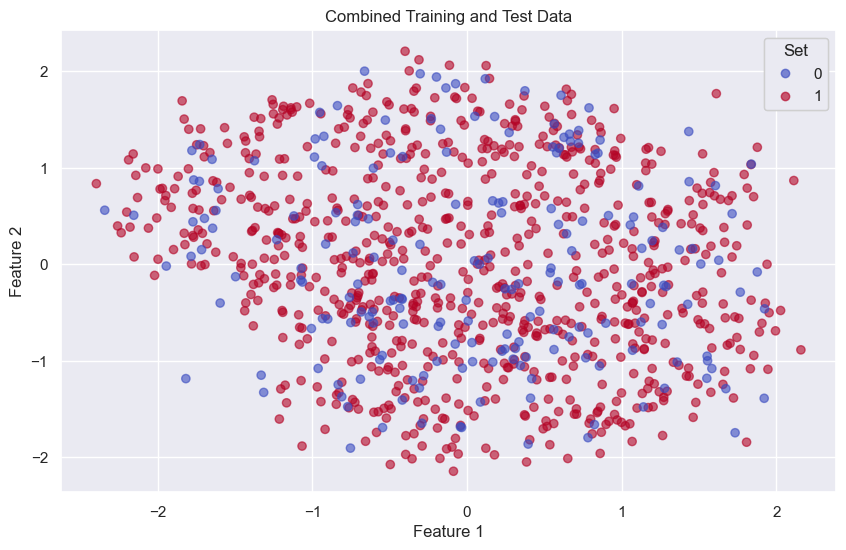

In [46]:
# To make plotting easier, group together train data and test data

# Unir datasets
X_combined = np.concatenate([X_train, X_test], axis=0)
y_combined = np.concatenate([y_train, y_test], axis=0)

# Crear array de etiquetas para diferenciar train y test
train_labels = np.ones(len(X_train))
test_labels = np.zeros(len(X_test))
set_labels = np.concatenate([train_labels, test_labels], axis=0)

# Plot the train and test datasets

# Graficar
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_combined[:, 0], X_combined[:, 1], c=set_labels, cmap='coolwarm', alpha=0.6)

# leyenda
legend1 = plt.legend(*scatter.legend_elements(), title="Set")
plt.gca().add_artist(legend1)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Combined Training and Test Data')
plt.show()

In [47]:
# Store the train and test datasets to use it later

# Combinar X e y para el conjunto de entrenamiento y el de prueba
train_combined = pd.concat([X_train, y_train], axis=1)
test_combined = pd.concat([X_test, y_test], axis=1)

# Guardar los datasets en archivos separados
train_combined.to_csv("train.dat", sep="\t", index=False)
test_combined.to_csv("test.dat", sep="\t", index=False)

### **We are all set!** 

You can continue to the next practice, to start applying your first ML algorithm to the data: _K-nearest neighbors_

Also: any further checks of processing you think you need, feel free to try here!